In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from time_series.data_generators.lorenz_generator import generate_lorenz_curve
from time_series.time_series_models import KernelRidgeRegression, MovingAverageEstimator
from time_series.kernels import GaussianKernel

2025-09-12 10:26:53.368 | INFO     | time_series.config:<module>:13 - PROJ_ROOT path is: /home/james/Repo/PhD Repo/time_series_clustering


In [3]:
t, data = generate_lorenz_curve(
    noise_mean=[0,0,0], 
    noise_cov=0.0*np.eye(3), 
    x0=[10,10,10],
    dt=0.01, 
    T=10,
    rho=28, 
    sigma=10, 
    beta=8/3
)

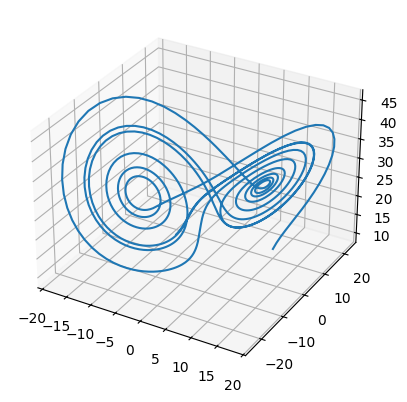

In [4]:
plt.figure().add_subplot(projection='3d')
plt.plot(*data.T);

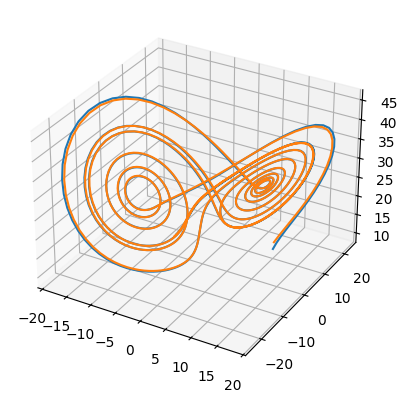

In [5]:
model = KernelRidgeRegression(
    kernels=[
        GaussianKernel(bandwidth=80),
        GaussianKernel(bandwidth=80),
        GaussianKernel(bandwidth=80),
    ],
    reg=1e-6,
    lag=1
)

model.fit(data)

y_pred = model.predict(data)

plt.figure().add_subplot(projection='3d')
plt.plot(*data.T);
plt.plot(*y_pred.T);

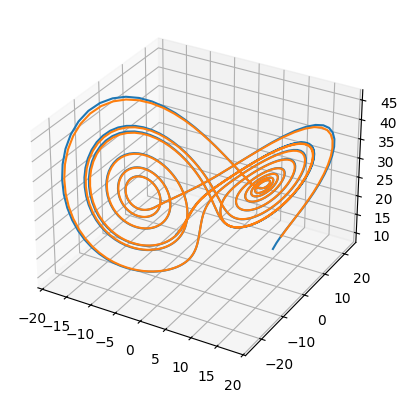

In [6]:
model = MovingAverageEstimator(lag=5)

model.fit(data)

y_pred = model.predict(data)

plt.figure().add_subplot(projection='3d')
plt.plot(*data.T);
plt.plot(*y_pred.T);